In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
df=pd.read_csv("/content/drive/MyDrive/day.csv")
df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [11]:
df.dropna(axis = 0, how ='any') 


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


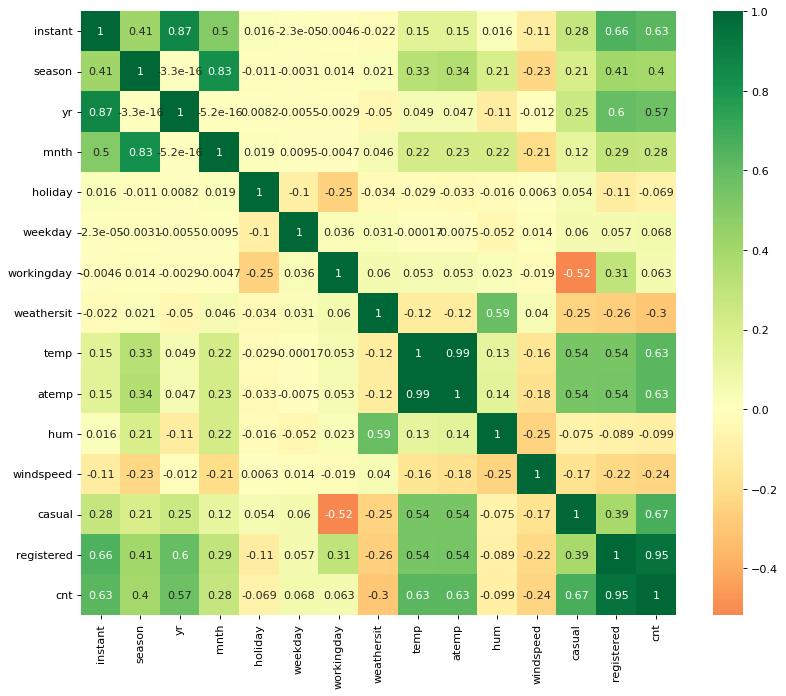

In [12]:
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn', center=0, annot=True)

In [29]:
x=df.drop(columns = ["yr","weekday","holiday","workingday","hum","mnth","weathersit","windspeed","season","dteday","cnt"])
y=(df["cnt"])
y
x

,instant,temp,atemp,casual,registered
0,1,14.110847,18.18125,331,654
1,2,14.902598,17.68695,131,670
2,3,8.050924,9.47025,120,1229
3,4,8.200000,10.60610,108,1454
4,5,9.305237,11.46350,82,1518
...,...,...,...,...,...
725,726,10.420847,11.33210,247,1867
726,727,10.386653,12.75230,644,2451
727,728,10.386653,12.12000,159,1182
728,729,10.489153,11.58500,364,1432


In [30]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
print(f'Train dataset size: {X_train.shape}, {y_train.shape}')
print(f'Test dataset size: {X_test.shape}, {y_test.shape}')

Train dataset size: (511, 5), (511,)
Test dataset size: (219, 5), (219,)


In [31]:
model = LinearRegression()
model.fit(X_train, y_train)  

LinearRegression()

In [34]:
print('Веса всех признаков (w1): ', model.coef_)
print('Свободный коэффицент уравнения w0:', model.intercept_)
print('Уравнение', model.coef_[0],"*instant +", model.coef_[1],"*temp +", model.coef_[2],"*atemp +", model.coef_[3],"*casual +", model.coef_[4],"*registered")

Веса всех признаков (w1):  [ 4.94474688e-15 -2.59570143e-13  2.20602616e-13  1.00000000e+00
  1.00000000e+00]
Свободный коэффицент уравнения w0: 2.7284841053187847e-12
Уравнение 4.9447468764020365e-15 *instant + -2.595701431573616e-13 *temp + 2.2060261603562559e-13 *atemp + 1.0000000000000002 *casual + 0.9999999999999989 *registered


In [35]:
y_pred = model.predict(X_test)
y_pred

array([6192., 4459., 2475., 6544.,  795., 4118., 6273., 2121., 4302.,
       6234., 3071., 5875., 4916., 2914., 4521.,  506., 3214., 5687.,
       4579., 3331., 3624., 8173., 2918., 4656., 2566., 2843., 4182.,
       1891., 3820., 7580., 6770., 4905., 3867., 6031., 3873., 3249.,
        627., 4094., 4748., 4401., 2311., 6436., 3717., 4985., 4046.,
       3376., 5026., 1683., 1951., 6855., 1446., 1977., 7403., 2432.,
       1685., 5191., 3190., 5260., 4966., 3915., 6203., 3598., 4040.,
       3068., 5611., 6591., 5041., 5323., 2132., 7415.,  683., 2633.,
       8167., 8555., 4400., 4075., 1162., 7148., 3351., 2227., 4486.,
       3846., 4590., 1526., 7591., 4274., 5686.,  959., 5107., 1421.,
       4460., 2298., 5511., 4318., 5629., 1796., 4687., 6883., 6530.,
       4151., 5986., 7410., 3659., 5743., 3811., 4570., 4375., 3005.,
       7965., 5423., 3830., 3115., 4563., 3747., 4972., 5905., 3940.,
       7350., 6565., 5342., 2913., 5047., 3709., 1027., 4649., 4189.,
       4338., 7040.,

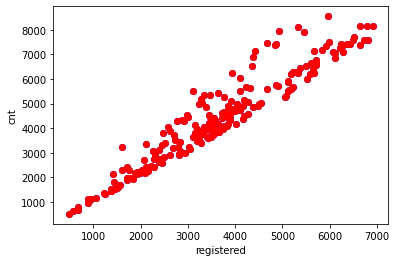

In [39]:
plt.scatter(X_test['registered'], y_test, color = 'blue')
plt.scatter(X_test['registered'], y_pred, color='red');
plt.xlabel("registered")
plt.ylabel("cnt")

plt.show()

In [40]:
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R2 score:', r2_score(y_test, y_pred))
# R2 равен 1 - модель работает плохо,также MSE и MAE далеко от 0

Mean Absolute Error: 1.1924140011258082e-12
Mean Squared Error: 2.321783139158723e-24
R2 score: 1.0
